## Visualize model outputs

#### Disabling Jupyter's inline scroll option

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Importing equired importing libraries

In [2]:
import os
import tensorflow as tf
from scripts.model_result_scripts import read_inputs_report, read_model_inputs, read_model, get_metrics_log, get_timekeeper
from IPython.display import clear_output, Image, display, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib
from IPython.display import Image

%matplotlib inline

#### Reading Model configuration and Input files
Set ```model_outputs_path``` output root folder of model outputs

In [3]:
model_outputs_path = "/home/nagellette/Desktop/model_outputs/"
ran_models = os.listdir(model_outputs_path)
ran_models.sort()
for index, folder in enumerate(ran_models):
    print("{}: {}".format(index + 1, folder))

chosen_index = int(input())
chosen_model = ran_models[chosen_index - 1]
working_path = "{}{}/".format(model_outputs_path, chosen_model)

clear_output()

root_file_list, image_file_list, model_type = read_inputs_report(working_path)
image_file_list.sort()
model_config, image_file_names = read_model_inputs(working_path)
time_log = get_timekeeper(working_path)

Working path: /home/nagellette/Desktop/model_outputs/resunetlight_2021_01_24-23_10_04/
Model in use: resunetlight
# available test images: 195
File in use: /home/nagellette/Desktop/model_outputs/resunetlight_2021_01_24-23_10_04/config.json
File in use: /home/nagellette/Desktop/model_outputs/resunetlight_2021_01_24-23_10_04/inputs.json

Model configuration:
Batch size: 2
Patch size: (256, 256)
Optimizer: SGD
Learning rate: 1e-05
Decay: 1e-06
Momentum: 0.9
Nesterov: True
# of epochs: 10
Train, Test, Validation split: 0.6, 0.2, 0.2
Rotation augmentation: 45
Patch overlap ratio: 0.2
Shuffle outputs: True
Seeding: 10
# training steps per epoch: 20
Model tested?: True
Model test size: 20
Model validation size: 5
Loss function: dice
Input files and standardization method:
File: montreal_20160720_B02_small.tif, Standardization: sentinel_msi
File: montreal_20160720_B03_small.tif, Standardization: sentinel_msi
File: montreal_20160720_B04_small.tif, Standardization: sentinel_msi
Training iteratio

#### Model Architecture:

Total parameters: 8920130
Trainable Parameters: 8911682
Non-trainable parameters: 8448


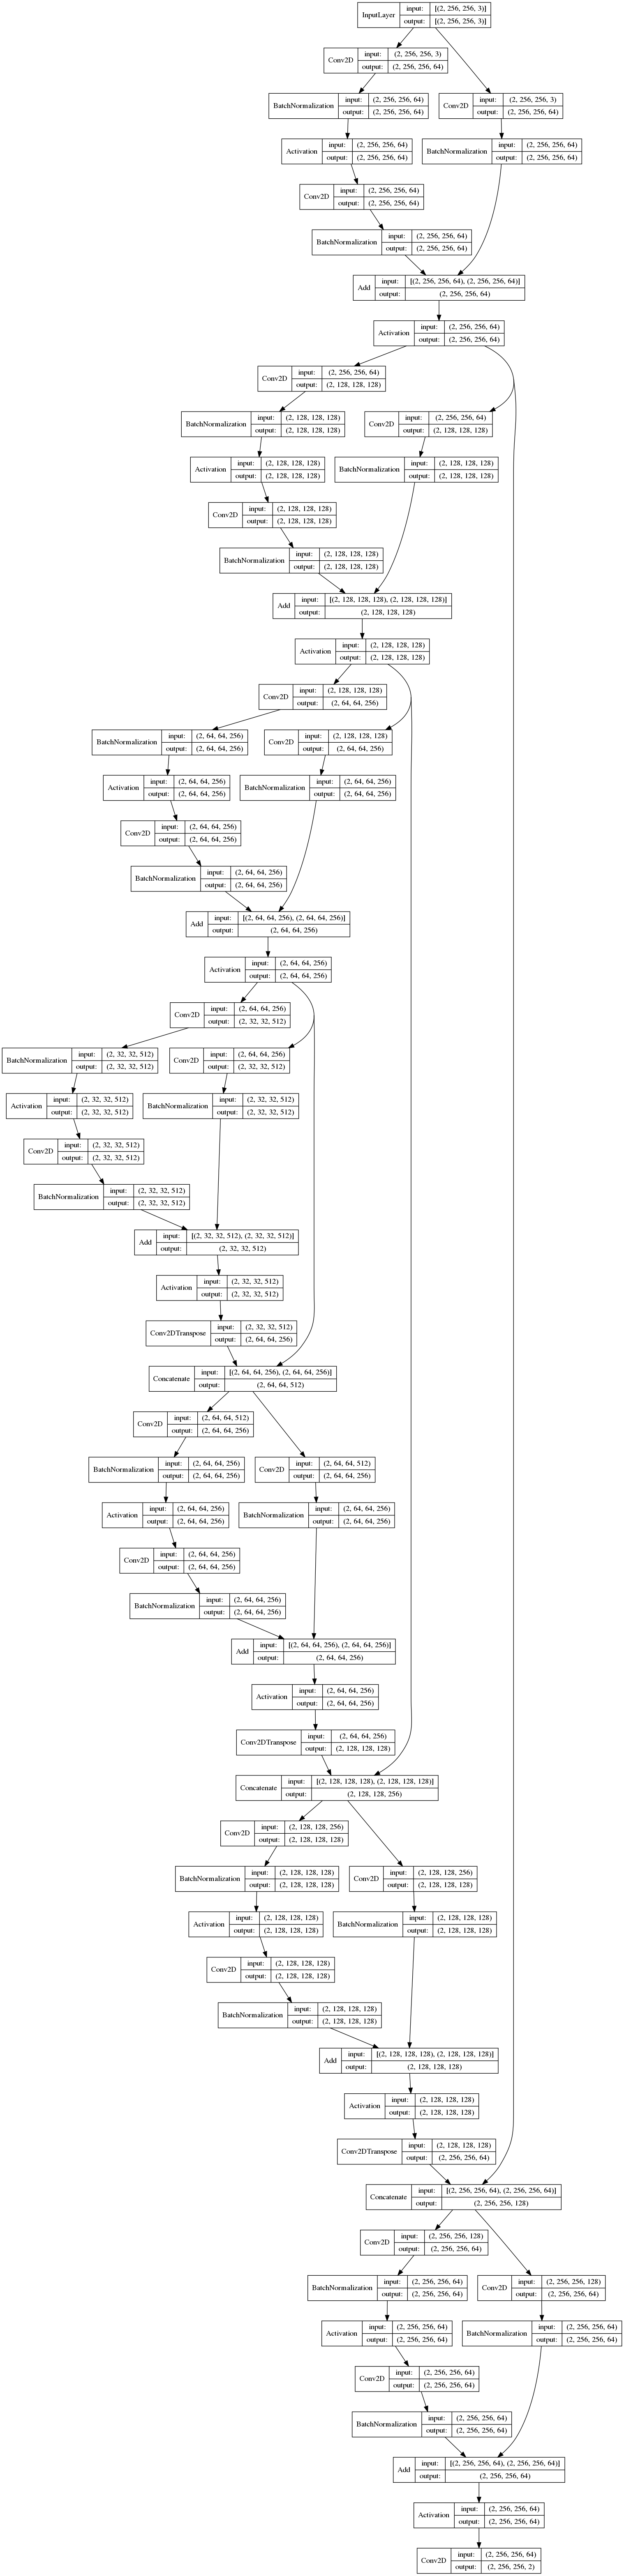

In [4]:
model = read_model(working_path)

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Model performance graphs

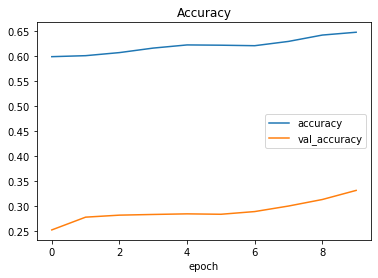

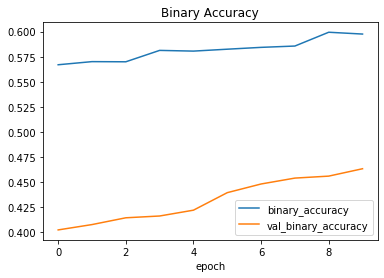

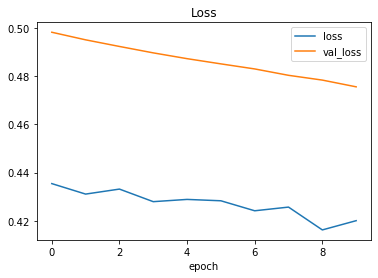

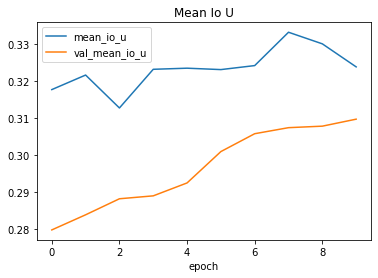

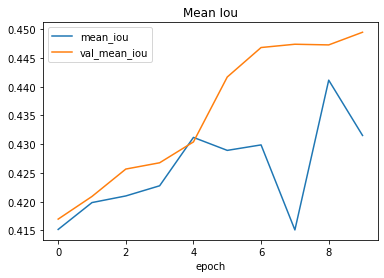

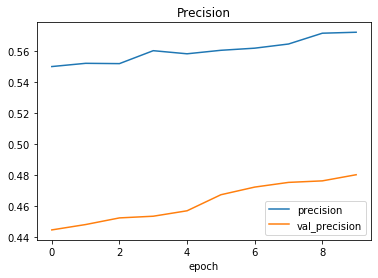

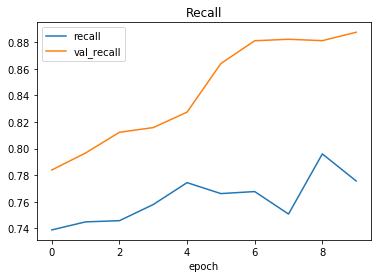

In [5]:
log = get_metrics_log(working_path)
columns = log.columns
metrics =[x.replace("val_", "") for x in columns if "val" in x]
for metric in metrics:
    log_temp = log[["epoch", metric, "val_" + metric]]
    plot = log_temp.set_index("epoch").plot(title=metric.title().replace("_", " "))

#### Process input files to avoid the ones that have data but not prediction

In [6]:
limit = 0
traj_available = False
speed_max_available = False
speed_avg_available = False

subgraph_count = 3

for i in range(len(image_file_list)):
    for file in image_file_list:
        if "traj_count" in file:
            if not traj_available:
                subgraph_count += 1
            traj_available = True
            
        if "speed_max" in file:
            if not speed_max_available:
                subgraph_count += 1
            speed_max_available = True
            
        if "speed_avg" in file:
            if not speed_avg_available:
                subgraph_count += 1
            speed_avg_available = True
            
        if file.startswith("{}_".format(str(i))) and "predict" in file:
            limit += 1
            break
            
width_ratio = []
for i in range(subgraph_count):
    width_ratio.append(10)

print("Trajectory count             : {}".format(traj_available))            
print("Speed max                    : {}".format(speed_max_available))            
print("Speed avg                    : {}".format(speed_avg_available))            
print("Number of prediction examples: {}".format(limit))

Trajectory count             : False
Speed max                    : False
Speed avg                    : False
Number of prediction examples: 20


#### Read predictions, labels and Sentinel RGB images.
- ```threshold```set to 0.5, change if required.
- Known issues:
    - Sentinel RGB image seems false color due to preprocessing.


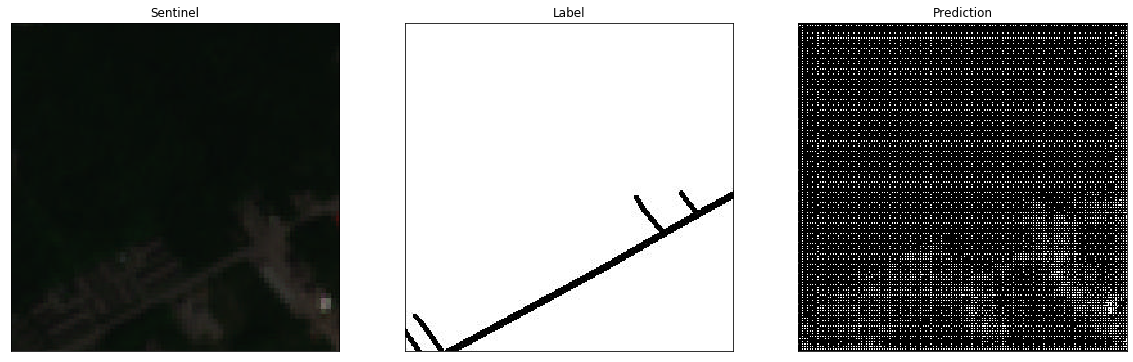

Label image patch doesn't contain any road.


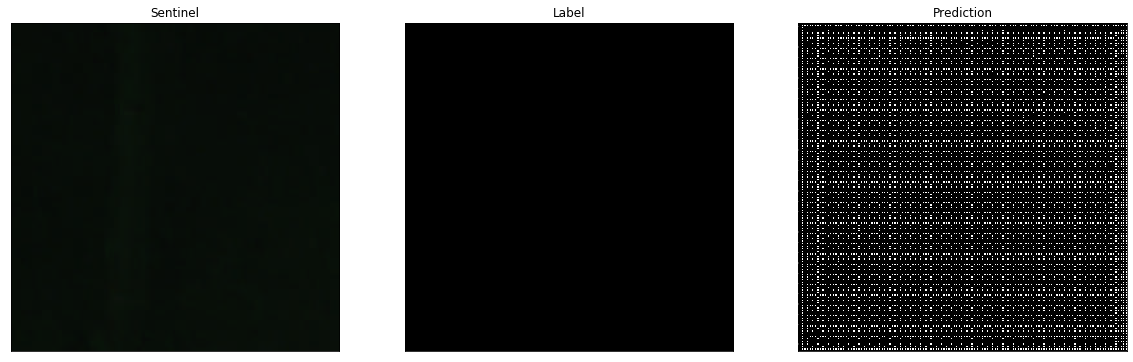

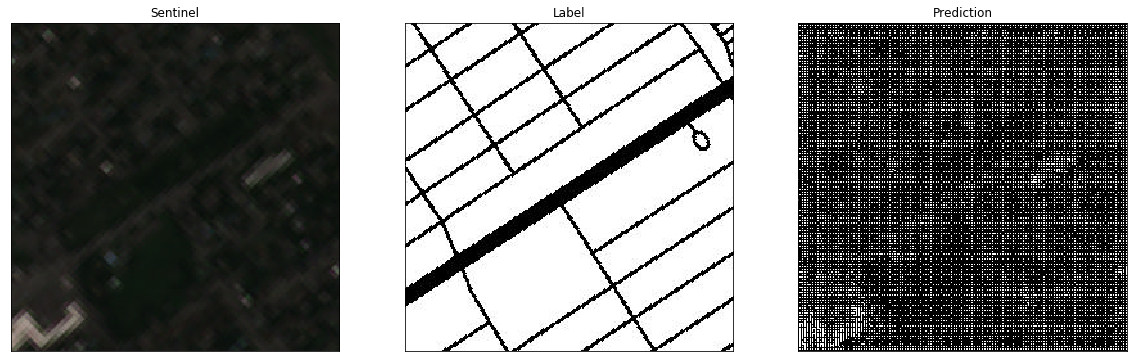

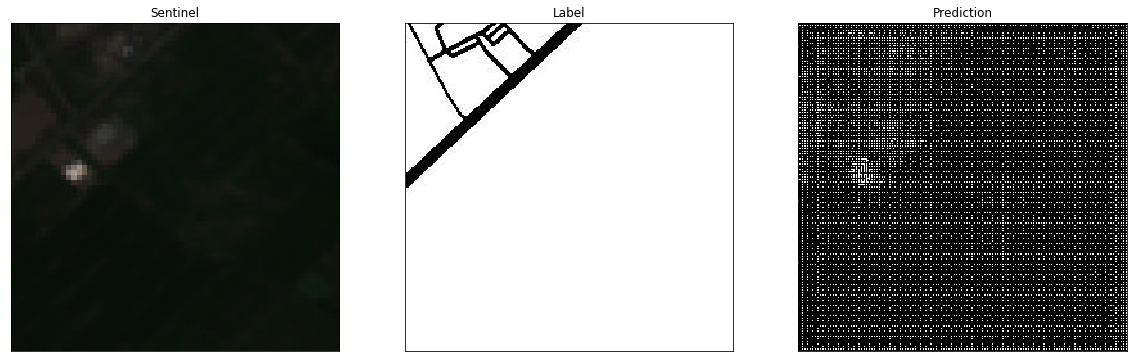

Label image patch doesn't contain any road.


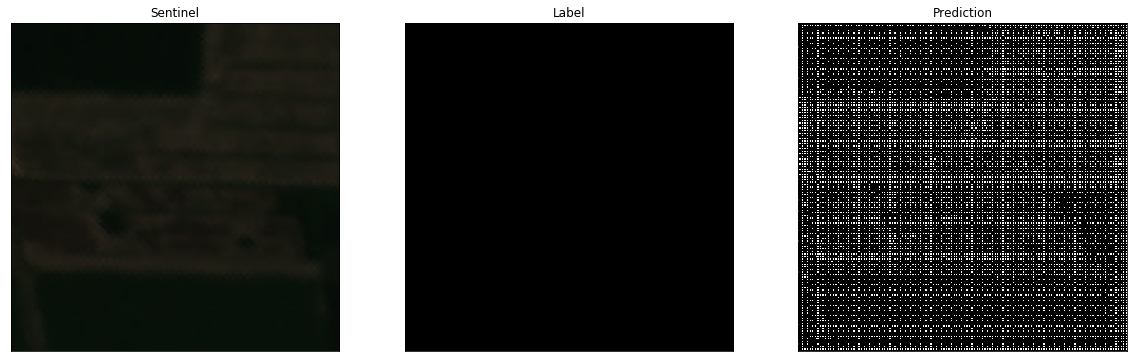

Label image patch doesn't contain any road.


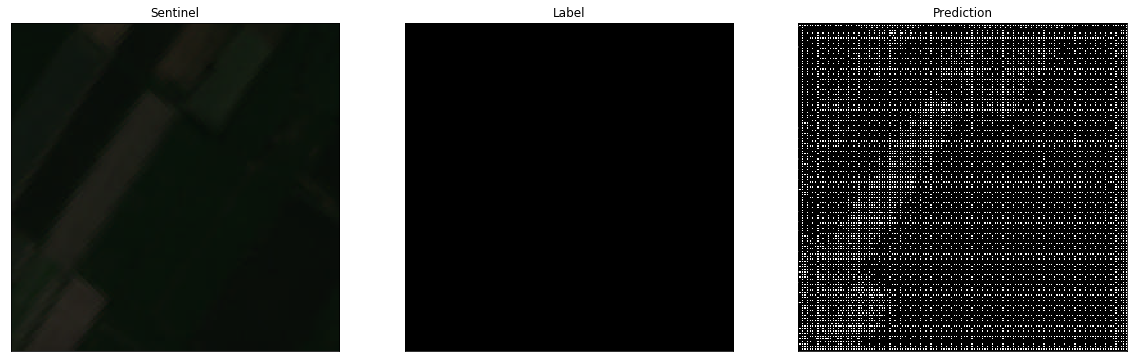

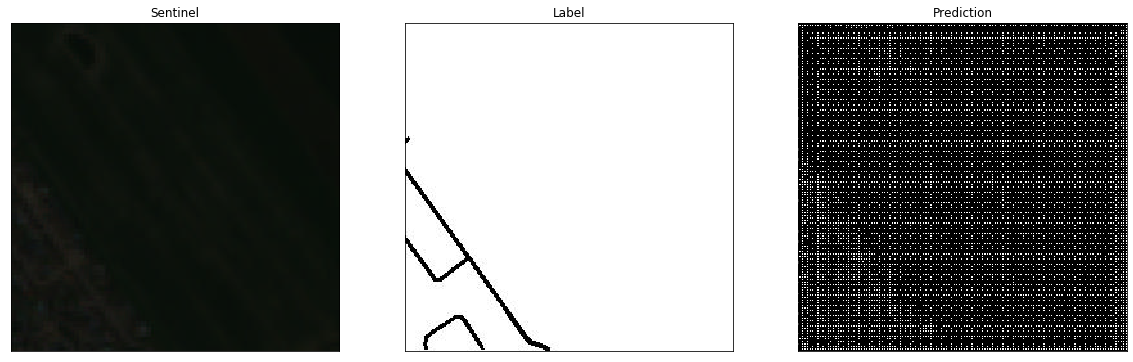

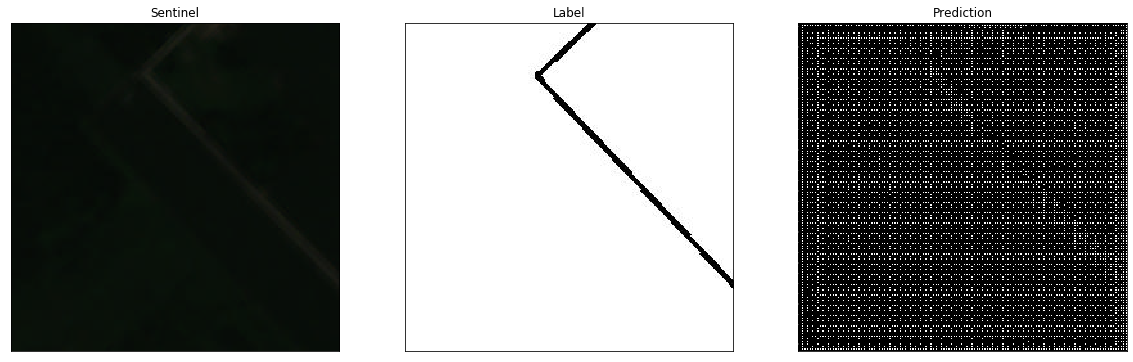

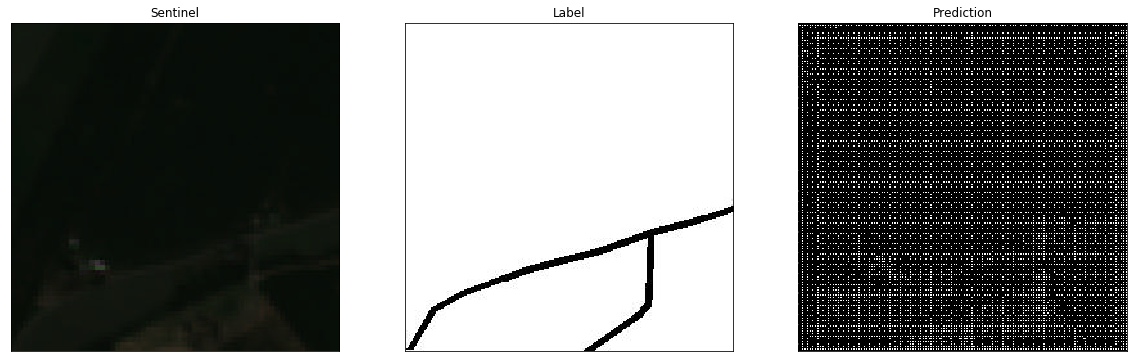

Label image patch doesn't contain any road.


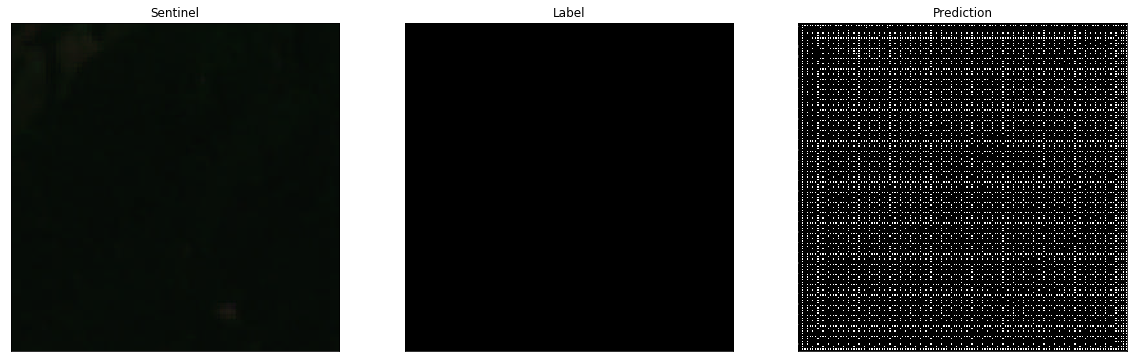

Label image patch doesn't contain any road.


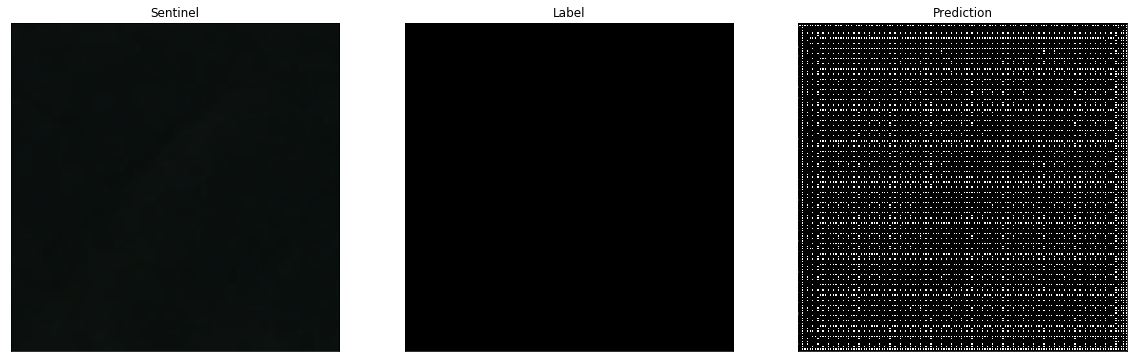

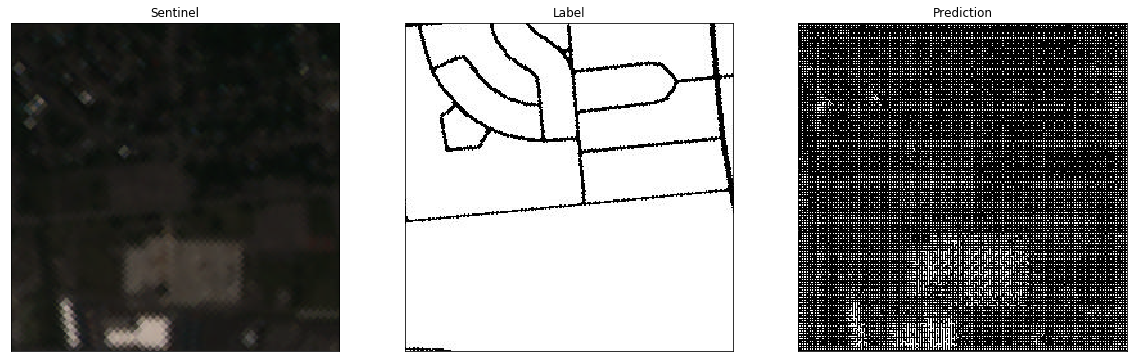

Label image patch doesn't contain any road.


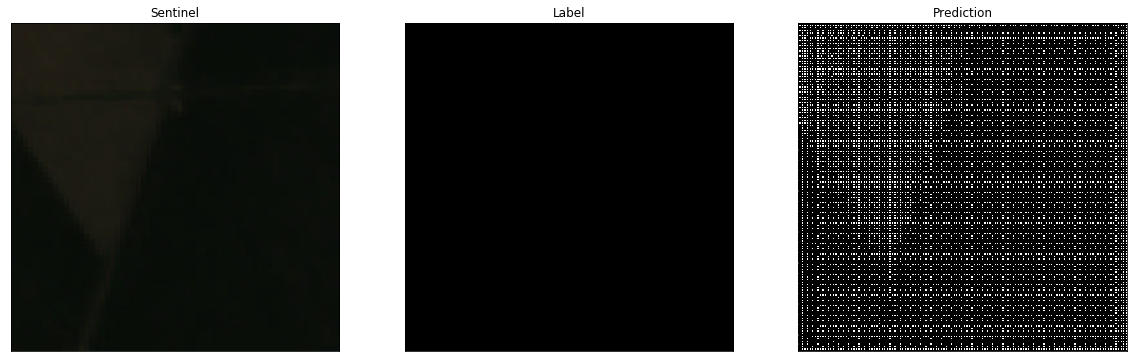

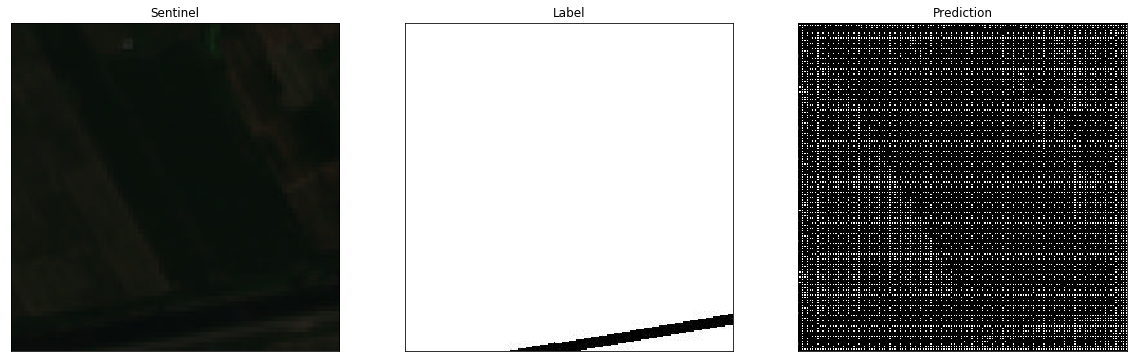

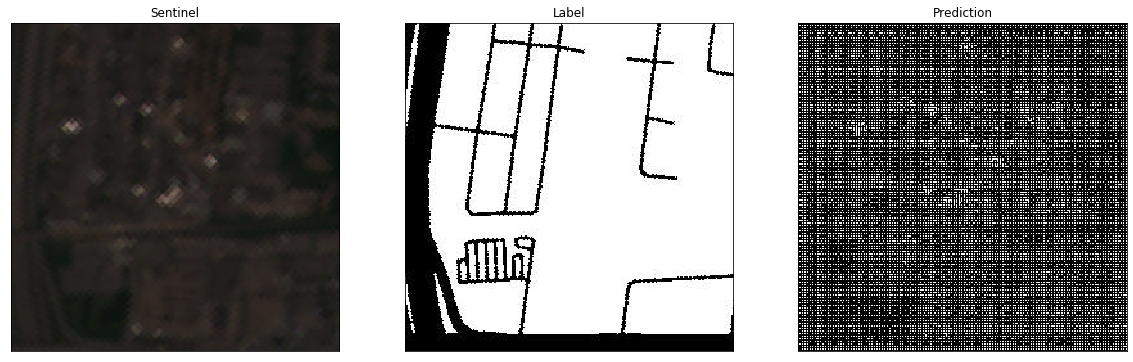

Label image patch doesn't contain any road.


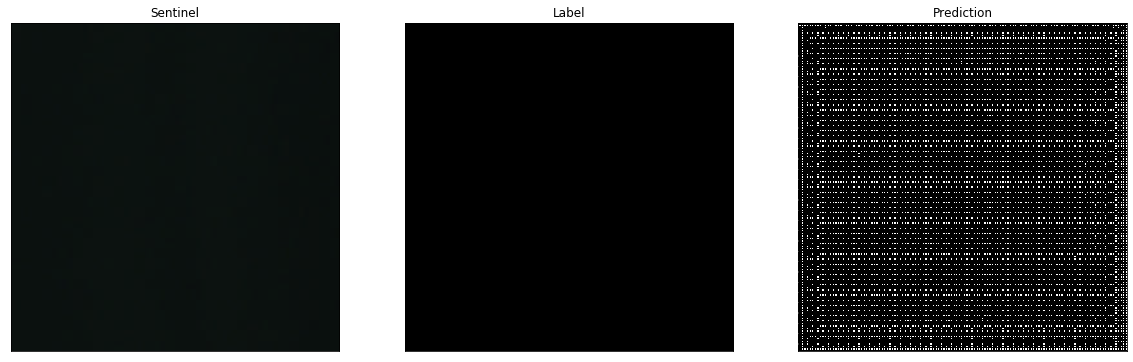

Label image patch doesn't contain any road.


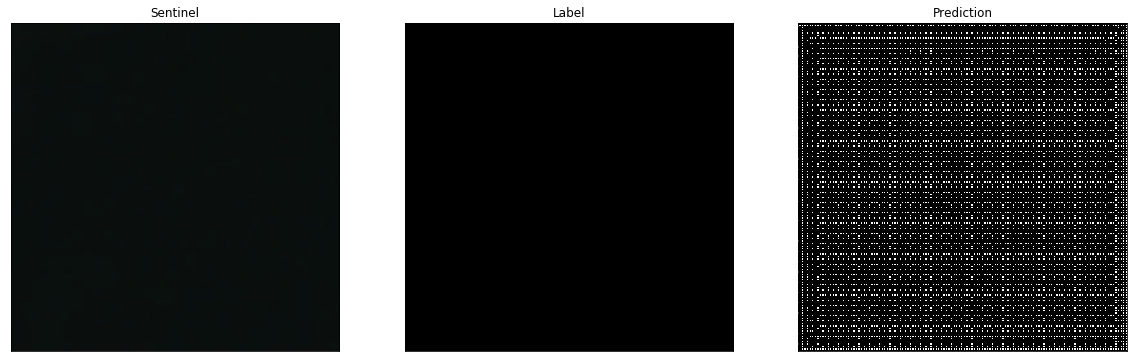

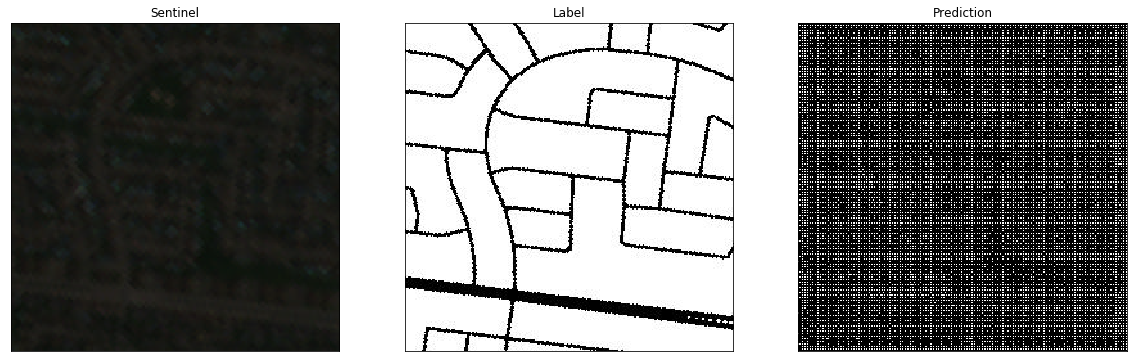

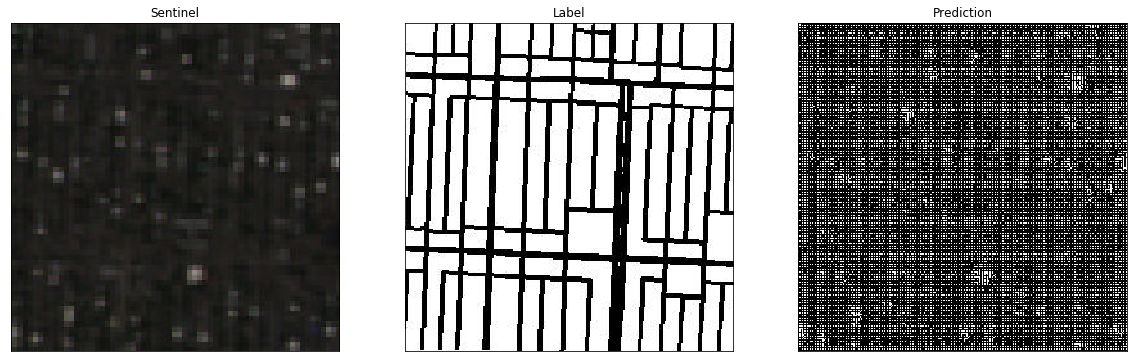

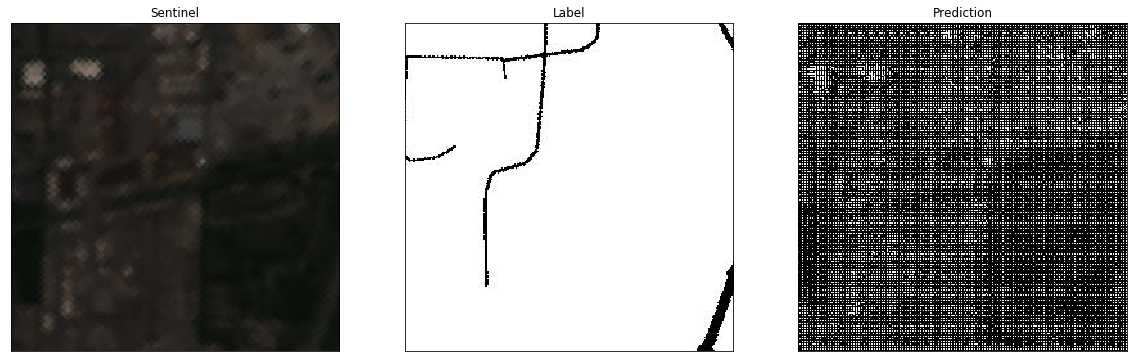

In [9]:
matplotlib.rcParams['figure.figsize'] = [20, 20]
subgraph_rem = 2

for i in range(limit):
    res = [idx for idx in image_file_list if idx.startswith("{}_".format(i))]
    f,ax = plt.subplots(1,subgraph_count, gridspec_kw={'width_ratios': width_ratio})
    for file in res:
        if "predict" in file and "_1." in file:
            predict = mpimg.imread('{}images/{}'.format(working_path, file))
            predict = predict < 0.5           
            predict = predict.astype(int)
            ax[2].imshow(predict, cmap="gray")
            ax[2].set_title("Prediction")
        
        elif "B02" in file:
            # blue
            blue = mpimg.imread('{}images/{}'.format(working_path, file))
        
        elif "B03" in file:
            # green
            green = mpimg.imread('{}images/{}'.format(working_path, file))
        
        elif "B04" in file:
            # red
            red = mpimg.imread('{}images/{}'.format(working_path, file))
        
        elif "label" in file and "_0_0." in file:
            # label
            label = mpimg.imread('{}images/{}'.format(working_path, file))
            ax[1].imshow(label, cmap="gray")
            ax[1].set_title("Label")
            
        elif "traj_count" in file:
            subgraph_rem += 1
            traj_count = mpimg.imread('{}images/{}'.format(working_path, file))
            ax[subgraph_rem].imshow(traj_count, cmap="gray")
            ax[subgraph_rem].set_title("Trajectory Density")
        
        elif "speed_max" in file:
            subgraph_rem += 1
            speed_max = mpimg.imread('{}images/{}'.format(working_path, file))
            ax[subgraph_rem].imshow(speed_max, cmap="gray")
            ax[subgraph_rem].set_title("Maximum speed")
        
        elif "speed_avg" in file:
            subgraph_rem += 1
            speed_avg = mpimg.imread('{}images/{}'.format(working_path, file))
            ax[subgraph_rem].imshow(speed_avg, cmap="gray")
            ax[subgraph_rem].set_title("Average speed")
            
    sentinel_img = np.dstack((red, green, blue))
    ax[0].imshow(sentinel_img, cmap="magma")
    ax[0].set_title("Sentinel")
  
    for x in ax:
        x.set_xticks([])
        x.set_yticks([])
        
    if label.mean() == 255.:
        print("Label image patch doesn't contain any road.")
    
    plt.show()
    subgraph_rem = 2